<a href="https://colab.research.google.com/github/negilbabu/Customer-Purchase-Prediction-ML-/blob/dev/Customer_Purchase_Prediction(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Set up Git Repo

In [1]:
!apt-get update
!apt-get install git

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading

In [2]:
!git clone https://github.com/negilbabu/Customer-Purchase-Prediction-ML-.git

fatal: destination path 'Customer-Purchase-Prediction-ML-' already exists and is not an empty directory.


In [3]:
%cd Customer-Purchase-Prediction-ML-/

/content/Customer-Purchase-Prediction-ML-


In [4]:
!git checkout dev

Already on 'dev'
Your branch is up to date with 'origin/dev'.


In [5]:
!git status

On branch dev
Your branch is up to date with 'origin/dev'.

nothing to commit, working tree clean


Set Up Kaggle

In [ ]:
! pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"negskaggle","key":"1a17f3b8301c1c5fb030b61f1eea0db4"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list -s "predict-customer-purchase-behavior-dataset"

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
rabieelkharoua/predict-customer-purchase-behavior-dataset           🛍️ Predict Customer Purchase Behavior Dataset        35KB  2024-06-19 02:48:24           3624         60  1.0              
rajeshrampure/black-friday-sale                                     Black Friday Sale                                     5MB  2022-12-24 09:37:49           8923         94  1.0              
fahmidachowdhury/customer-segmentation-data-for-marketing-analysis  Customer Segmentation Data for Marketing Analysis    16KB  2024-06-28 15:58:29           3990         62  0.9411765        
rabieelkharoua/predict-conversion-in-dig

In [ ]:
!kaggle datasets download -d rabieelkharoua/predict-customer-purchase-behavior-dataset

Dataset URL: https://www.kaggle.com/datasets/rabieelkharoua/predict-customer-purchase-behavior-dataset
License(s): Attribution 4.0 International (CC BY 4.0)
predict-customer-purchase-behavior-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip predict-customer-purchase-behavior-dataset.zip

Archive:  predict-customer-purchase-behavior-dataset.zip
replace customer_purchase_data.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: customer_purchase_data.csv  


Importing necessory Libraries

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
df = pd.read_csv("/content/Customer-Purchase-Prediction-ML-/customer_purchase_data.csv")

In [8]:
print(df)

      Age  Gender   AnnualIncome  NumberOfPurchases  ProductCategory  \
0      40       1   66120.267939                  8                0   
1      20       1   23579.773583                  4                2   
2      27       1  127821.306432                 11                2   
3      24       1  137798.623120                 19                3   
4      31       1   99300.964220                 19                1   
...   ...     ...            ...                ...              ...   
1495   39       1   65048.141834                 13                0   
1496   67       1   28775.331069                 18                2   
1497   40       1   57363.247541                  7                4   
1498   63       0  134021.775532                 16                2   
1499   50       0   52625.665974                 13                0   

      TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
0              30.568601               0                 5

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1500 non-null   int64  
 1   Gender              1500 non-null   int64  
 2   AnnualIncome        1500 non-null   float64
 3   NumberOfPurchases   1500 non-null   int64  
 4   ProductCategory     1500 non-null   int64  
 5   TimeSpentOnWebsite  1500 non-null   float64
 6   LoyaltyProgram      1500 non-null   int64  
 7   DiscountsAvailed    1500 non-null   int64  
 8   PurchaseStatus      1500 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 105.6 KB


In [ ]:
df.describe()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000
mean,44.298667,0.504667,84249.164338,10.420000,2.012667,30.469040,0.326667,2.555333,0.43200
std,15.537259,0.500145,37629.493078,5.887391,1.428005,16.984392,0.469151,1.705152,0.49552
min,18.000000,0.000000,20001.512518,0.000000,0.000000,1.037023,0.000000,0.000000,0.00000
25%,31.000000,0.000000,53028.979155,5.000000,1.000000,16.156700,0.000000,1.000000,0.00000
50%,45.000000,1.000000,83699.581476,11.000000,2.000000,30.939516,0.000000,3.000000,0.00000
75%,57.000000,1.000000,117167.772858,15.000000,3.000000,44.369863,1.000000,4.000000,1.00000
max,70.000000,1.000000,149785.176481,20.000000,4.000000,59.991105,1.000000,5.000000,1.00000


In [ ]:
df.head()

,Age,Gender,AnnualIncome,NumberOfPurchases,ProductCategory,TimeSpentOnWebsite,LoyaltyProgram,DiscountsAvailed,PurchaseStatus
0,40,1,66120.267939,8,0,30.568601,0,5,1
1,20,1,23579.773583,4,2,38.240097,0,5,0
2,27,1,127821.306432,11,2,31.633212,1,0,1
3,24,1,137798.623120,19,3,46.167059,0,4,1
4,31,1,99300.964220,19,1,19.823592,0,0,1


In [ ]:
df.shape

(1500, 9)

Trim whitespaces from column name

In [10]:
df.columns = df.columns.str.strip()

Checking for any null values

In [ ]:
print("Checking if there are any null values in any of the attributes",df.isnull().sum())

Checking if there are any null values in any of the attributes Age                   0
Gender                0
AnnualIncome          0
NumberOfPurchases     0
ProductCategory       0
TimeSpentOnWebsite    0
LoyaltyProgram        0
DiscountsAvailed      0
PurchaseStatus        0
dtype: int64


Checking for any Duplication

In [ ]:
print("Checking if there are any duplicated entries\nDuplicated rows: ", df.duplicated().sum())

Checking if there are any duplicated entries
Duplicated rows:  112


In [9]:
df_removed_duplicates = df.drop_duplicates()
print("Total rows after removing duplicates", df_removed_duplicates.shape)

Total rows after removing duplicates (1388, 9)


In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

numeric_scalable_features = ['Age', 'AnnualIncome', 'TimeSpentOnWebsite' ]
df_removed_duplicates[numeric_scalable_features] = scaler.fit_transform(df_removed_duplicates[numeric_scalable_features])

df_removed_duplicates.info(), df_removed_duplicates.head()

<class 'pandas.core.frame.DataFrame'>
Index: 1388 entries, 0 to 1499
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1388 non-null   float64
 1   Gender              1388 non-null   int64  
 2   AnnualIncome        1388 non-null   float64
 3   NumberOfPurchases   1388 non-null   int64  
 4   ProductCategory     1388 non-null   int64  
 5   TimeSpentOnWebsite  1388 non-null   float64
 6   LoyaltyProgram      1388 non-null   int64  
 7   DiscountsAvailed    1388 non-null   int64  
 8   PurchaseStatus      1388 non-null   int64  
dtypes: float64(3), int64(6)
memory usage: 108.4 KB


(None,
         Age  Gender  AnnualIncome  NumberOfPurchases  ProductCategory  \
 0 -0.254456       1     -0.495070                  8                0   
 1 -1.546283       1     -1.628648                  4                2   
 2 -1.094144       1      1.149081                 11                2   
 3 -1.287918       1      1.414947                 19                3   
 4 -0.835778       1      0.389098                 19                1   
 
    TimeSpentOnWebsite  LoyaltyProgram  DiscountsAvailed  PurchaseStatus  
 0           -0.010544               0                 5               1  
 1            0.441498               0                 5               0  
 2            0.052188               1                 0               1  
 3            0.908594               0                 4               1  
 4           -0.643694               0                 0               1  )

Plotting the distribution of features

In [28]:
plt.clf()

<Figure size 640x480 with 0 Axes>

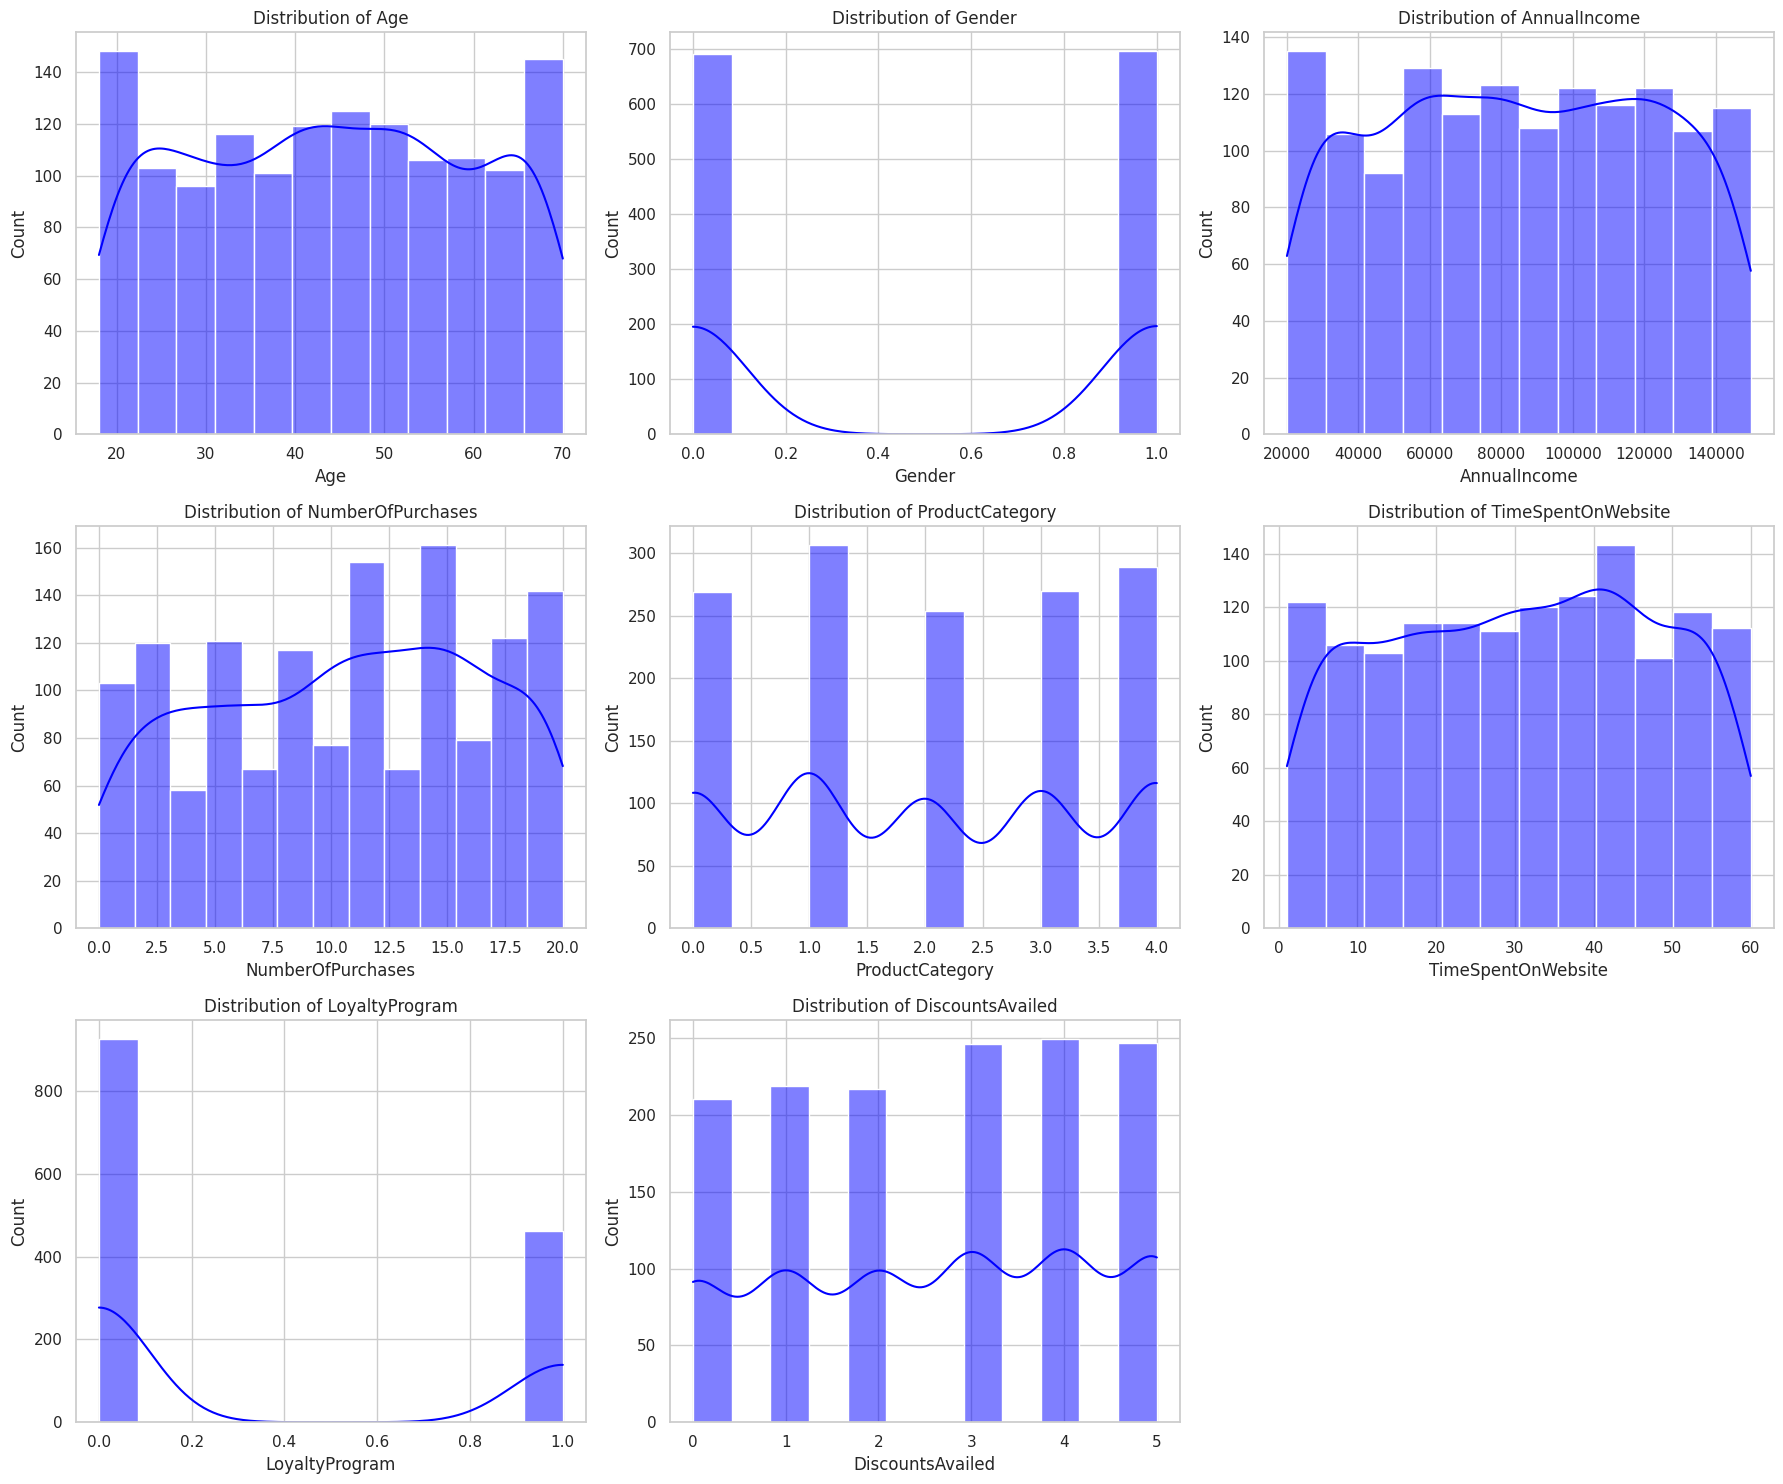

In [10]:


sns.set(style="whitegrid")

features_to_plot = [feature for feature in df_removed_duplicates.columns if feature != "PurchaseStatus"]
num_features = len(features_to_plot)
num_rows = (num_features + 2) // 3
num_cols = min(num_features, 3)
fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 5 * num_rows))
axes = axes.flatten()

for i, feature in enumerate(features_to_plot):
  sns.histplot(df_removed_duplicates[feature], kde=True, ax=axes[i], color="blue")
  axes[i].set_title(f"Distribution of {feature}")

for j in range(len(features_to_plot), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()



Analyzing the relationship between features and target variable

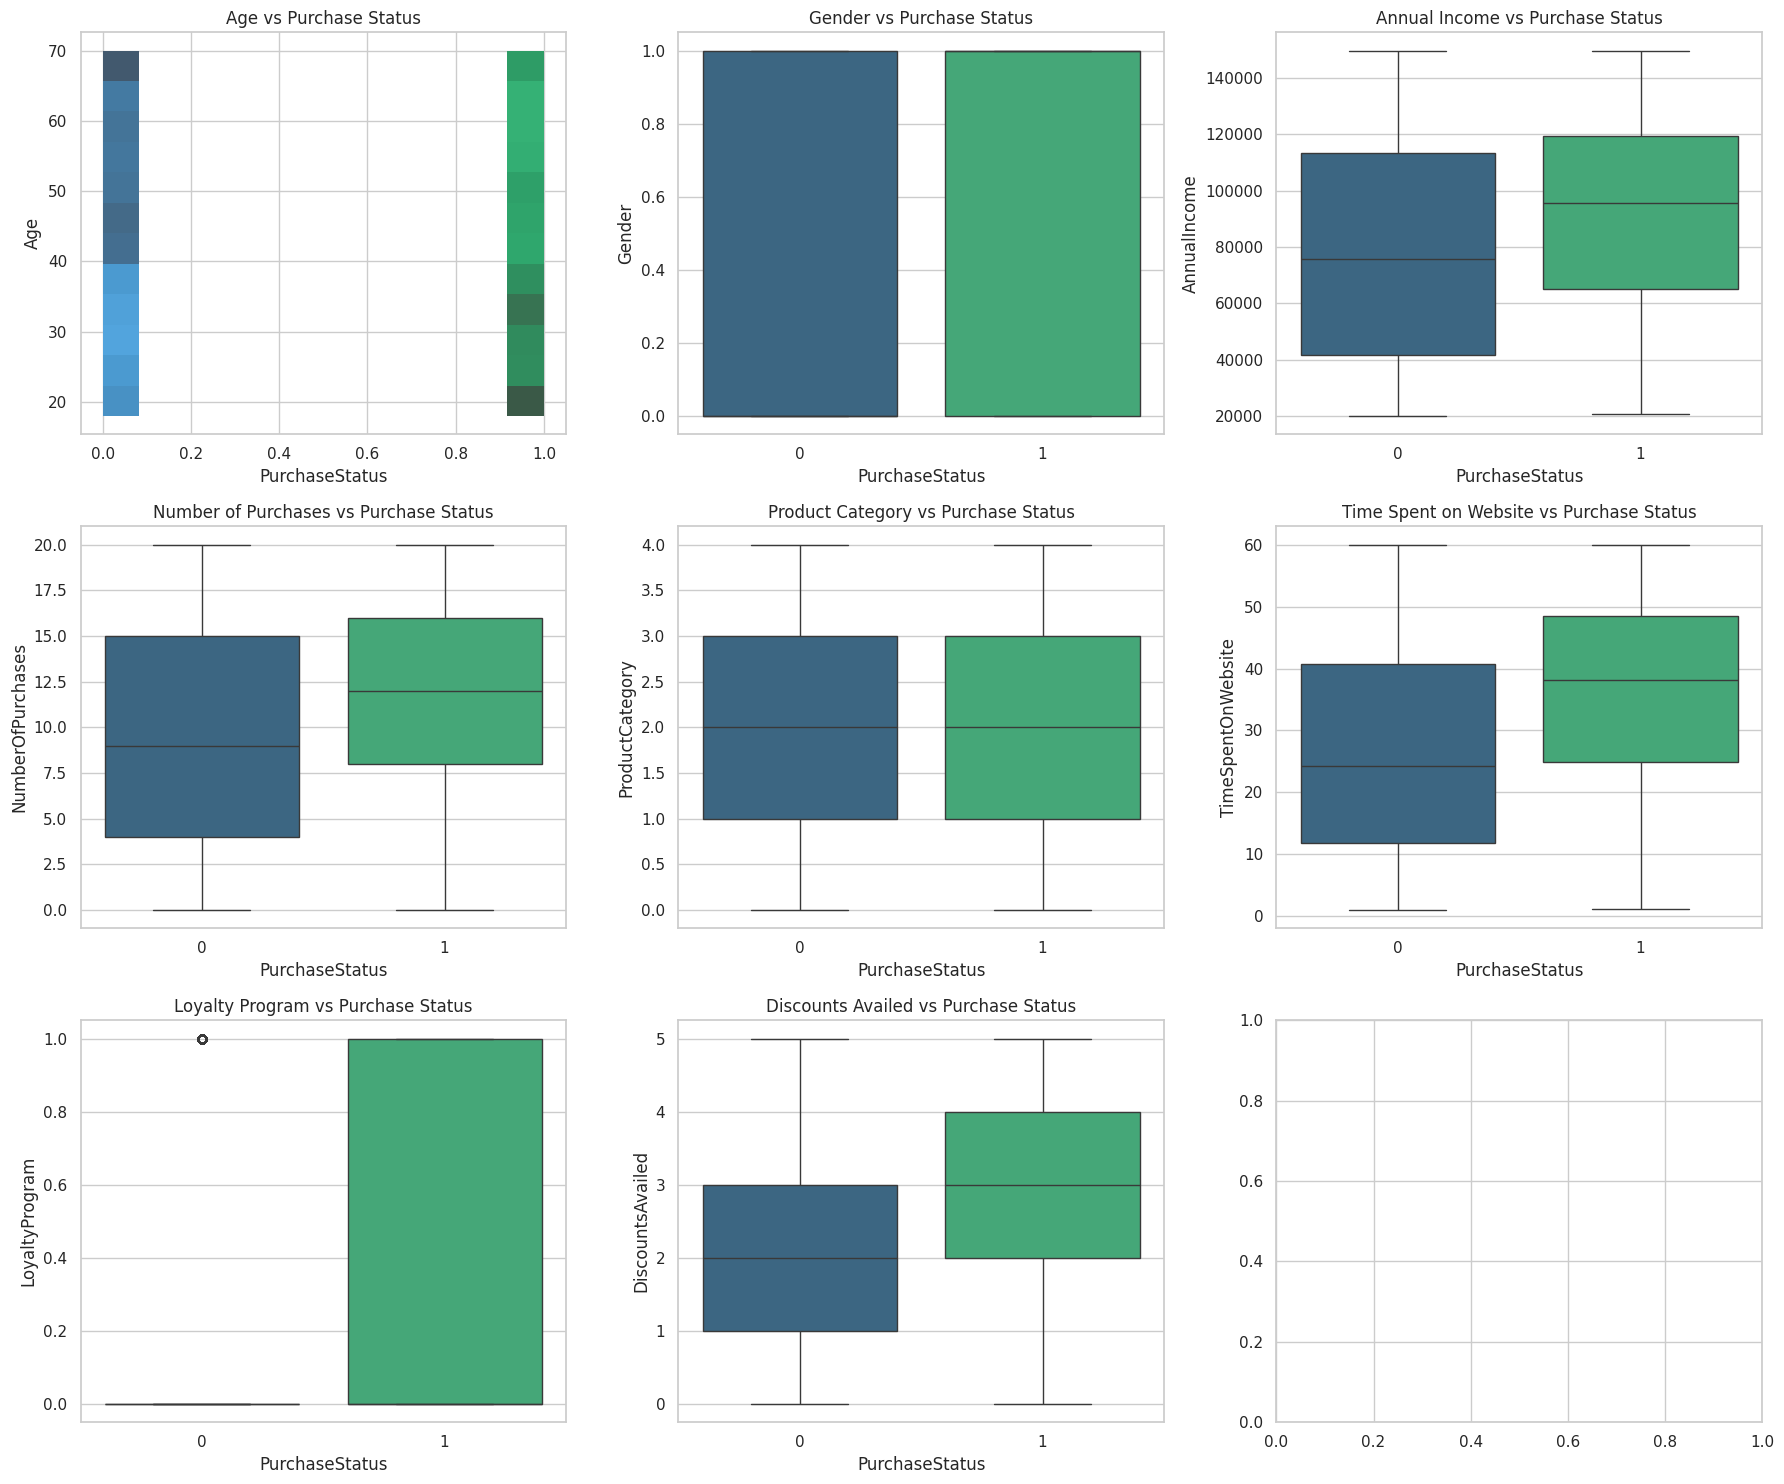

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))

sns.histplot(x="PurchaseStatus", y="Age", data=df_removed_duplicates, ax=axes[0, 0], palette="viridis", hue="PurchaseStatus", legend=False)
axes[0, 0].set_title("Age vs Purchase Status")

sns.boxplot(x="PurchaseStatus", y="Gender", data=df_removed_duplicates, ax=axes[0, 1], palette="viridis", hue="PurchaseStatus", legend=False)
axes[0, 1].set_title("Gender vs Purchase Status")

sns.boxplot(x="PurchaseStatus", y="AnnualIncome", data=df_removed_duplicates, ax=axes[0, 2], palette="viridis", hue="PurchaseStatus", legend=False)
axes[0, 2].set_title("Annual Income vs Purchase Status")

sns.boxplot(x="PurchaseStatus", y="NumberOfPurchases", data=df_removed_duplicates, ax=axes[1, 0], palette="viridis", hue="PurchaseStatus", legend=False)
axes[1, 0].set_title("Number of Purchases vs Purchase Status")

sns.boxplot(x="PurchaseStatus", y="ProductCategory", data=df_removed_duplicates, ax=axes[1, 1], palette="viridis", hue="PurchaseStatus", legend=False)
axes[1, 1].set_title("Product Category vs Purchase Status")

sns.boxplot(x="PurchaseStatus", y="TimeSpentOnWebsite", data=df_removed_duplicates, ax=axes[1, 2], palette="viridis", hue="PurchaseStatus", legend=False)
axes[1, 2].set_title("Time Spent on Website vs Purchase Status")

sns.boxplot(x="PurchaseStatus", y="LoyaltyProgram", data=df_removed_duplicates, ax=axes[2, 0], palette="viridis", hue="PurchaseStatus", legend=False)
axes[2, 0].set_title("Loyalty Program vs Purchase Status")

sns.boxplot(x="PurchaseStatus", y="DiscountsAvailed", data=df_removed_duplicates, ax=axes[2, 1], palette="viridis", hue="PurchaseStatus", legend=False)
axes[2, 1].set_title("Discounts Availed vs Purchase Status")

# Hide any extra subplot areas
for i in range(len(df_removed_duplicates.columns), len(axes.flatten())):
    axes.flatten()[i].set_visible(False)

plt.tight_layout()
plt.show()


Correlation Heatmap

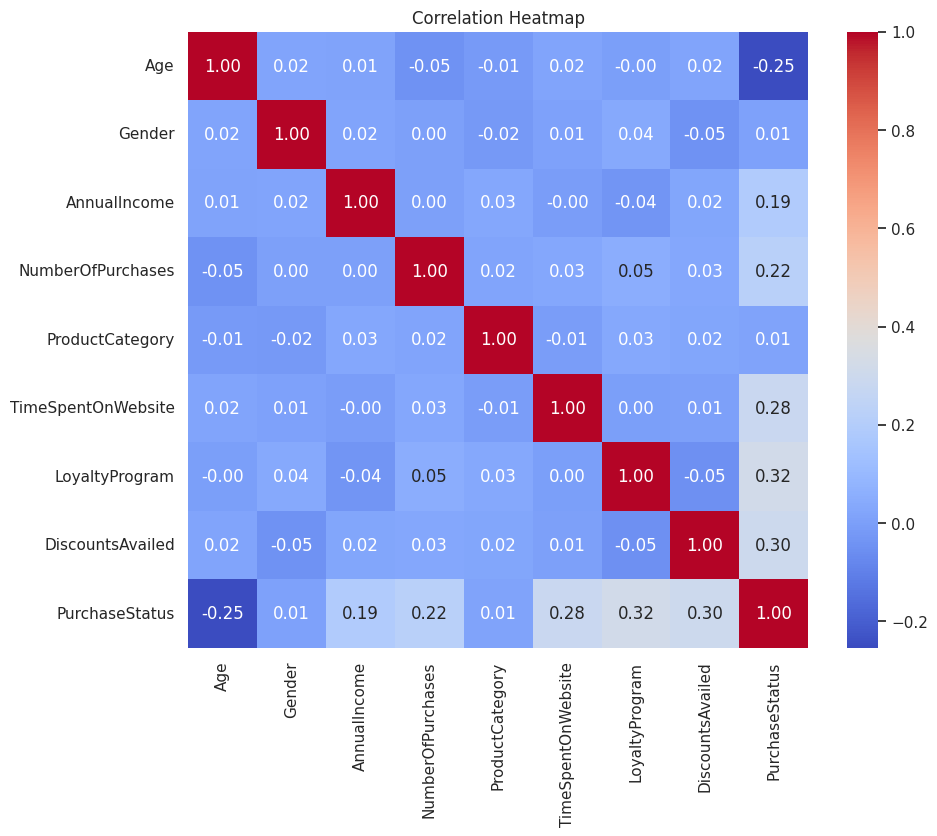

In [ ]:
plt.figure(figsize=(10, 8))
correlation_matrix = df_removed_duplicates.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

Splitting the data into training and test data

In [22]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [15]:
from sklearn.model_selection import train_test_split

X = df_removed_duplicates.drop(columns=['PurchaseStatus'])
y = df_removed_duplicates['PurchaseStatus']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [19]:
model = DecisionTreeClassifier(criterion="gini", max_depth=4, random_state=42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [20]:
y_pred = model.predict(X_test)

In [21]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.802158273381295


In [23]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [24]:
y_pred = model.predict(X_test)

In [25]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.9172661870503597


In [30]:
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

In [31]:
y_pred = model.predict(X_test)

In [32]:
accuracy = accuracy_score(y_test , y_pred)
print('Accuracy:' , accuracy)

Accuracy: 0.8309352517985612
